In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.1.0


In [2]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

import matplotlib.pyplot as plt
import cufflinks as cf               # third-party library for Pandas 
import plotly.offline as pyo
import plotly.graph_objs as go
%matplotlib inline
cf.go_offline()
pyo.init_notebook_mode(connected=True)

## Let's start with one product CHOCO 20CL

In [726]:
types={ 
    "G" : "int32",
    "M" : "int32",
    "DG" : "int32",
    "FF" : "int32",
    "K" : "int32",
    "GM" : "int32",
    "0.1" : "int32",
    "CAF" : "int32",
    "S" : "int32",
    "PL" : "int32",
    "P" : "int32",
    "Amazigh" : "int32",
    "Islam" : "int32",
    "Holiday" : "int32",
    "Scholar" : "int32",
    "Semaine" : "int32",
    "Temperature" : "float16",
    "Humidity" : "float16",
    "CHOCO 20CL" : "int32",
    "TWIST O-M 20CL" : "int32"
}

Series = pd.read_csv("Input_output_bfrk1.csv",header=0,engine='c',index_col=[0],dtype=types)
Series["Temperature"]=Series["Temperature"].fillna(Series["Temperature"].mean()) 
Series["Humidity"]=Series["Humidity"].fillna(Series["Humidity"].mean()) 
Series=Series[Series["Semaine"]==5]
Series=Series.drop(Series.columns[21:],axis=1)
Series=Series.drop(Series.columns[19],axis=1)
Series=Series.drop(Series.columns[0],axis=1)
Series.tail()

,G,M,DG,FF,K,GM,0.1,CAF,S,PL,P,Amazigh,Islam,Holiday,Scholar,Semaine,Humidity,Temperature,DE 1L
422,13,60,0,0,0,13,0,0,7,0,1,0,0,3,0,5,0.689941,55.5000,1644.0
425,14,60,0,0,0,14,0,0,10,0,1,0,0,3,0,5,0.810059,55.8750,1824.0
427,13,66,0,0,2,13,0,0,7,0,0,0,0,3,0,5,0.649902,60.1875,1428.0
429,13,66,0,0,0,13,0,0,7,0,0,0,0,3,1,5,0.640137,56.1875,1128.0
431,21,72,0,0,0,21,0,0,6,0,2,0,0,3,1,5,0.790039,51.8125,1416.0


In [727]:
TRAIN_SIZE=int(len(Series)*0.95)
Nbre_feat = len(Series.columns)
Nbre_feat,TRAIN_SIZE

(19, 147)

In [728]:
prod_transformer = RobustScaler()
prod_transformer = prod_transformer.fit(Series.iloc[:TRAIN_SIZE,-1:])
Series.iloc[:,-1:] = prod_transformer.transform(Series.iloc[:,-1:])

# Series.iloc[:,-1:] = prod_transformer.inverse_transform(Series.iloc[:,-1:])
Series.tail()

,G,M,DG,FF,K,GM,0.1,CAF,S,PL,P,Amazigh,Islam,Holiday,Scholar,Semaine,Humidity,Temperature,DE 1L
422,13,60,0,0,0,13,0,0,7,0,1,0,0,3,0,5,0.689941,55.5000,0.521739
425,14,60,0,0,0,14,0,0,10,0,1,0,0,3,0,5,0.810059,55.8750,0.956522
427,13,66,0,0,2,13,0,0,7,0,0,0,0,3,0,5,0.649902,60.1875,0.000000
429,13,66,0,0,0,13,0,0,7,0,0,0,0,3,1,5,0.640137,56.1875,-0.724638
431,21,72,0,0,0,21,0,0,6,0,2,0,0,3,1,5,0.790039,51.8125,-0.028986


In [729]:
f_transformer = RobustScaler()
f_transformer = f_transformer.fit(Series.iloc[:TRAIN_SIZE,:-1])

Series.iloc[:,:-1] = prod_transformer.transform(Series.iloc[:,:-1])
Series

,G,M,DG,FF,K,GM,0.1,CAF,S,PL,P,Amazigh,Islam,Holiday,Scholar,Semaine,Humidity,Temperature,DE 1L
0,-3.371981,-3.214976,-3.449275,-3.449275,-3.449275,-3.371981,-3.449275,-3.449275,-3.434783,-3.449275,-3.449275,-3.449275,-3.449275,-3.449275,-3.446860,-3.437198,-3.447270,-3.333711,-0.753623
1,-3.386473,-3.142512,-3.449275,-3.449275,-3.449275,-3.386473,-3.449275,-3.449275,-3.405797,-3.449275,-3.449275,-3.449275,-3.449275,-3.444444,-3.449275,-3.437198,-3.447125,-3.325030,2.231884
3,-3.405797,-3.212560,-3.449275,-3.449275,-3.449275,-3.405797,-3.449275,-3.449275,-3.427536,-3.449275,-3.449275,-3.449275,-3.449275,-3.442029,-3.449275,-3.437198,-3.446860,-3.342467,0.115942
4,-3.374396,-3.239130,-3.449275,-3.449275,-3.449275,-3.374396,-3.449275,-3.449275,-3.422705,-3.449275,-3.449275,-3.449275,-3.449275,-3.442029,-3.449275,-3.437198,-3.446860,-3.329408,0.840580
6,-3.391304,-3.251208,-3.449275,-3.449275,-3.449275,-3.391304,-3.449275,-3.449275,-3.422705,-3.449275,-3.429952,-3.449275,-3.449275,-3.442029,-3.449275,-3.437198,-3.447150,-3.351147,-1.217391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,-3.417874,-3.304348,-3.449275,-3.449275,-3.449275,-3.417874,-3.449275,-3.449275,-3.432367,-3.449275,-3.446860,-3.449275,-3.449275,-3.442029,-3.449275,-3.437198,-3.447609,-3.315217,0.521739
425,-3.415459,-3.304348,-3.449275,-3.449275,-3.449275,-3.415459,-3.449275,-3.449275,-3.425121,-3.449275,-3.446860,-3.449275,-3.449275,-3.442029,-3.449275,-3.437198,-3.447319,-3.314312,0.956522
427,-3.417874,-3.289855,-3.449275,-3.449275,-3.444444,-3.417874,-3.449275,-3.449275,-3.432367,-3.449275,-3.449275,-3.449275,-3.449275,-3.442029,-3.449275,-3.437198,-3.447706,-3.303895,0.000000
429,-3.417874,-3.289855,-3.449275,-3.449275,-3.449275,-3.417874,-3.449275,-3.449275,-3.432367,-3.449275,-3.449275,-3.449275,-3.449275,-3.442029,-3.446860,-3.437198,-3.447729,-3.313557,-0.724638


In [730]:
Series.iloc[:,-2].max()

-3.2207125603864735

In [731]:
# split_time = 350
# time_train = Series.index[:split_time]
# train = Series[:split_time]
# time_test = Series.index[split_time:]
# test = Series[split_time:]
# train.iloc[:,-1].max()

In [732]:
data=go.Scatter(
            x = time_train,
            y = train.iloc[:,-1],
            mode="lines",
            name=f"TWIST",)
fig=go.Figure(data=data)
pyo.iplot(fig)

In [733]:
# def create_dataset(X, y, time_steps=1):
#     Xs, ys = [], []
#     for i in range(len(X) - time_steps):
#         v = X[i:(i + time_steps)]
#         Xs.append(v)
#         ys.append(y[i + time_steps])
#     return np.array(Xs), np.array(ys)

In [734]:
# time_steps = 30
# # reshape to [samples, time_steps, n_features]
# X_train, y_train = create_dataset(train.iloc[:,:-1].to_numpy(),train.iloc[:,-1:].to_numpy(), time_steps)
# X_test, y_test = create_dataset(test.iloc[:,:-1].to_numpy(),test.iloc[:,-1:].to_numpy(), time_steps)
# X_train.shape,y_train.shape

In [735]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1,:], tf.expand_dims(w[-1:,-1], axis=-1)))
    return ds.batch(batch_size).prefetch(1)

In [736]:
def model_forecast(model, series, window_size,batch_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(batch_size).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [737]:
window_size = 8
batch_size = 64
shuffle_buffer_size = len(Series)

In [738]:
tf.keras.backend.clear_session()
train_set = windowed_dataset(Series.to_numpy()[:TRAIN_SIZE,:], window_size, batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)

In [739]:
def create_model():
    model = tf.keras.models.Sequential([
      tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                          strides=1, padding="causal",
                          activation="relu",
                          input_shape=[None,Nbre_feat])
                                      ,
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
      tf.keras.layers.Dense(64,activation="relu"),
      tf.keras.layers.Dense(32,activation="relu"),
    #   tf.keras.layers.Dense(1,activation="sigmoid"),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Lambda(lambda x: x*200)
    ])

    optimizer = tf.keras.optimizers.RMSprop(1e-5)

    model.compile(loss=tf.keras.losses.Huber(),
                  optimizer=optimizer,
                  metrics=["mae","accuracy"])

    return model

model = create_model()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 32)          3072      
_________________________________________________________________
bidirectional (Bidirectional (None, None, 64)          16640     
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 64)          24832     
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 64)          24832     
_________________________________________________________________
dense (Dense)                (None, None, 64)          4160      
_________________________________________________________________
dense_1 (Dense)              (None, None, 32)          2080      
_________________________________________________________________
dense_2 (Dense)              (None, None, 1)           3

In [740]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-7 * 10**(epoch / 20))

# optimizer = tf.keras.optimizers.SGD(lr=1, momentum=0.9)

checkpoint_path = "2nd_model.ckpt"

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

history = model.fit(train_set, epochs=1000,callbacks=[cp_callback])

Epoch 1/1000
      3/Unknown - 9s 3s/step - loss: 2.9417 - mae: 3.5213 - accuracy: 0.0090  
Epoch 00001: saving model to 2nd_model.ckpt
3/3 [==============================] - 9s 3s/step - loss: 2.9659 - mae: 3.5213 - accuracy: 0.0090
Epoch 2/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.3223 - mae: 2.8040 - accuracy: 0.0098
Epoch 00002: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 119ms/step - loss: 2.1982 - mae: 2.6826 - accuracy: 0.0090
Epoch 3/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.7699 - mae: 2.2282 - accuracy: 0.0098
Epoch 00003: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 104ms/step - loss: 1.7018 - mae: 2.1723 - accuracy: 0.0090
Epoch 4/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4442 - mae: 1.8964 - accuracy: 0.0117
Epoch 00004: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 106ms/step - loss: 1.3889 - mae: 1.8479 - accuracy: 0.0108
Epoch 5

1/3 [=========>....................] - ETA: 0s - loss: 0.3006 - mae: 0.6447 - accuracy: 0.0000e+00
Epoch 00033: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 105ms/step - loss: 0.2511 - mae: 0.6249 - accuracy: 0.0135
Epoch 34/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2841 - mae: 0.6294 - accuracy: 0.0000e+00
Epoch 00034: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 94ms/step - loss: 0.2674 - mae: 0.6377 - accuracy: 0.0117
Epoch 35/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.3069 - mae: 0.6388 - accuracy: 0.0000e+00
Epoch 00035: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 114ms/step - loss: 0.2711 - mae: 0.6281 - accuracy: 0.0126
Epoch 36/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.3379 - mae: 0.6729 - accuracy: 0.0156
Epoch 00036: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 98ms/step - loss: 0.3451 - mae: 0.6380 - accur

2/3 [===================>..........] - ETA: 0s - loss: 0.2494 - mae: 0.5718 - accuracy: 0.0156
Epoch 00065: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 122ms/step - loss: 0.2523 - mae: 0.5767 - accuracy: 0.0144
Epoch 66/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2204 - mae: 0.5610 - accuracy: 0.0078
Epoch 00066: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 102ms/step - loss: 0.2851 - mae: 0.6014 - accuracy: 0.0108
Epoch 67/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2483 - mae: 0.5752 - accuracy: 0.0000e+00
Epoch 00067: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 114ms/step - loss: 0.2514 - mae: 0.5816 - accuracy: 0.0144
Epoch 68/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2769 - mae: 0.6174 - accuracy: 0.0000e+00
Epoch 00068: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 114ms/step - loss: 0.2279 - mae: 0.5867 - accurac

1/3 [=========>....................] - ETA: 0s - loss: 0.2464 - mae: 0.5850 - accuracy: 0.0000e+00
Epoch 00097: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 139ms/step - loss: 0.2368 - mae: 0.5643 - accuracy: 0.0144
Epoch 98/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2558 - mae: 0.5797 - accuracy: 0.0156
Epoch 00098: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 119ms/step - loss: 0.2394 - mae: 0.5581 - accuracy: 0.0144
Epoch 99/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2091 - mae: 0.5076 - accuracy: 0.0312
Epoch 00099: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 94ms/step - loss: 0.2513 - mae: 0.5534 - accuracy: 0.0144
Epoch 100/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.1761 - mae: 0.4821 - accuracy: 0.0000e+00
Epoch 00100: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 92ms/step - loss: 0.2271 - mae: 0.5474 - accuracy

1/3 [=========>....................] - ETA: 0s - loss: 0.2282 - mae: 0.5569 - accuracy: 0.0098
Epoch 00129: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 91ms/step - loss: 0.2581 - mae: 0.5522 - accuracy: 0.0117
Epoch 130/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.1524 - mae: 0.4493 - accuracy: 0.0312
Epoch 00130: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 99ms/step - loss: 0.2572 - mae: 0.5359 - accuracy: 0.0144
Epoch 131/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2568 - mae: 0.5905 - accuracy: 0.0156
Epoch 00131: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 121ms/step - loss: 0.2324 - mae: 0.5408 - accuracy: 0.0144
Epoch 132/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2193 - mae: 0.5395 - accuracy: 0.0156
Epoch 00132: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 91ms/step - loss: 0.2627 - mae: 0.5415 - accuracy: 0.014

1/3 [=========>....................] - ETA: 0s - loss: 0.2501 - mae: 0.5738 - accuracy: 0.0000e+00
Epoch 00161: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 110ms/step - loss: 0.2166 - mae: 0.5423 - accuracy: 0.0144
Epoch 162/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2542 - mae: 0.5510 - accuracy: 0.0312
Epoch 00162: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 149ms/step - loss: 0.2040 - mae: 0.5252 - accuracy: 0.0144
Epoch 163/1000
2/3 [===================>..........] - ETA: 0s - loss: 0.2074 - mae: 0.5174 - accuracy: 0.0146
Epoch 00163: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 166ms/step - loss: 0.2409 - mae: 0.5270 - accuracy: 0.0135
Epoch 164/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2324 - mae: 0.5490 - accuracy: 0.0156
Epoch 00164: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 105ms/step - loss: 0.2041 - mae: 0.5387 - accuracy

1/3 [=========>....................] - ETA: 0s - loss: 0.1855 - mae: 0.4796 - accuracy: 0.0000e+00
Epoch 00193: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 110ms/step - loss: 0.2140 - mae: 0.5179 - accuracy: 0.0144
Epoch 194/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.3017 - mae: 0.6533 - accuracy: 0.0000e+00
Epoch 00194: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 89ms/step - loss: 0.2150 - mae: 0.5587 - accuracy: 0.0144
Epoch 195/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2626 - mae: 0.5768 - accuracy: 0.0000e+00
Epoch 00195: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 102ms/step - loss: 0.2224 - mae: 0.5287 - accuracy: 0.0135
Epoch 196/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.3475 - mae: 0.7088 - accuracy: 0.0195
Epoch 00196: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 100ms/step - loss: 0.1949 - mae: 0.5644 - a

1/3 [=========>....................] - ETA: 0s - loss: 0.2111 - mae: 0.5194 - accuracy: 0.0156
Epoch 00225: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 145ms/step - loss: 0.2563 - mae: 0.5259 - accuracy: 0.0144
Epoch 226/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.3136 - mae: 0.6348 - accuracy: 0.0156
Epoch 00226: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 98ms/step - loss: 0.2309 - mae: 0.5412 - accuracy: 0.0126
Epoch 227/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2584 - mae: 0.5707 - accuracy: 0.0156
Epoch 00227: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 93ms/step - loss: 0.2075 - mae: 0.5315 - accuracy: 0.0126
Epoch 228/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2538 - mae: 0.5779 - accuracy: 0.0000e+00
Epoch 00228: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 102ms/step - loss: 0.2020 - mae: 0.5378 - accuracy: 

1/3 [=========>....................] - ETA: 0s - loss: 0.2329 - mae: 0.5469 - accuracy: 0.0156
Epoch 00257: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 116ms/step - loss: 0.2054 - mae: 0.5184 - accuracy: 0.0126
Epoch 258/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2674 - mae: 0.5855 - accuracy: 0.0000e+00
Epoch 00258: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 110ms/step - loss: 0.2206 - mae: 0.5135 - accuracy: 0.0135
Epoch 259/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.1551 - mae: 0.4306 - accuracy: 0.0156
Epoch 00259: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 96ms/step - loss: 0.2483 - mae: 0.5153 - accuracy: 0.0144
Epoch 260/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2619 - mae: 0.5682 - accuracy: 0.0156
Epoch 00260: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 124ms/step - loss: 0.1943 - mae: 0.5175 - accuracy:

1/3 [=========>....................] - ETA: 0s - loss: 0.2322 - mae: 0.5458 - accuracy: 0.0059
Epoch 00289: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 95ms/step - loss: 0.1900 - mae: 0.5263 - accuracy: 0.0099
Epoch 290/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.1729 - mae: 0.4731 - accuracy: 0.0000e+00
Epoch 00290: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 88ms/step - loss: 0.2046 - mae: 0.5100 - accuracy: 0.0144
Epoch 291/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2486 - mae: 0.5616 - accuracy: 0.0156
Epoch 00291: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 135ms/step - loss: 0.1954 - mae: 0.5183 - accuracy: 0.0144
Epoch 292/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.1698 - mae: 0.4614 - accuracy: 0.0156
Epoch 00292: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 116ms/step - loss: 0.2054 - mae: 0.5175 - accuracy: 

1/3 [=========>....................] - ETA: 0s - loss: 0.2435 - mae: 0.5604 - accuracy: 0.0156
Epoch 00321: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 123ms/step - loss: 0.1811 - mae: 0.5067 - accuracy: 0.0144
Epoch 322/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2450 - mae: 0.5343 - accuracy: 0.0137
Epoch 00322: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 116ms/step - loss: 0.1994 - mae: 0.5079 - accuracy: 0.0135
Epoch 323/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2558 - mae: 0.5602 - accuracy: 0.0000e+00
Epoch 00323: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 90ms/step - loss: 0.2580 - mae: 0.5146 - accuracy: 0.0144
Epoch 324/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2694 - mae: 0.6125 - accuracy: 0.0195
Epoch 00324: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 105ms/step - loss: 0.2293 - mae: 0.5429 - accuracy:

1/3 [=========>....................] - ETA: 0s - loss: 0.1315 - mae: 0.4316 - accuracy: 0.0254
Epoch 00353: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 115ms/step - loss: 0.2106 - mae: 0.5158 - accuracy: 0.0117
Epoch 354/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.3042 - mae: 0.6461 - accuracy: 0.0000e+00
Epoch 00354: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 102ms/step - loss: 0.2268 - mae: 0.5507 - accuracy: 0.0144
Epoch 355/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.1723 - mae: 0.4788 - accuracy: 0.0000e+00
Epoch 00355: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 113ms/step - loss: 0.1910 - mae: 0.5033 - accuracy: 0.0126
Epoch 356/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2533 - mae: 0.5603 - accuracy: 0.0156
Epoch 00356: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 97ms/step - loss: 0.2023 - mae: 0.5037 - accur

1/3 [=========>....................] - ETA: 0s - loss: 0.2415 - mae: 0.5633 - accuracy: 0.0000e+00
Epoch 00385: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 91ms/step - loss: 0.2011 - mae: 0.5133 - accuracy: 0.0126
Epoch 386/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2453 - mae: 0.5608 - accuracy: 0.0156
Epoch 00386: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 113ms/step - loss: 0.2032 - mae: 0.5107 - accuracy: 0.0144
Epoch 387/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2185 - mae: 0.5172 - accuracy: 0.0156
Epoch 00387: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 108ms/step - loss: 0.2119 - mae: 0.5168 - accuracy: 0.0135
Epoch 388/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.1786 - mae: 0.4551 - accuracy: 0.0156
Epoch 00388: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 124ms/step - loss: 0.1873 - mae: 0.4959 - accuracy:

1/3 [=========>....................] - ETA: 0s - loss: 0.1662 - mae: 0.4638 - accuracy: 0.0293
Epoch 00417: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 95ms/step - loss: 0.2103 - mae: 0.4970 - accuracy: 0.0135
Epoch 418/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2347 - mae: 0.5885 - accuracy: 0.0156
Epoch 00418: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 112ms/step - loss: 0.2724 - mae: 0.5546 - accuracy: 0.0072
Epoch 419/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2358 - mae: 0.5331 - accuracy: 0.0156
Epoch 00419: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 122ms/step - loss: 0.1824 - mae: 0.5113 - accuracy: 0.0144
Epoch 420/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.1801 - mae: 0.4612 - accuracy: 0.0137
Epoch 00420: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 111ms/step - loss: 0.2297 - mae: 0.4978 - accuracy: 0.0

1/3 [=========>....................] - ETA: 0s - loss: 0.1496 - mae: 0.4297 - accuracy: 0.0312
Epoch 00449: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 107ms/step - loss: 0.1785 - mae: 0.4942 - accuracy: 0.0144
Epoch 450/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.1436 - mae: 0.4356 - accuracy: 0.0156
Epoch 00450: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 105ms/step - loss: 0.1800 - mae: 0.5018 - accuracy: 0.0144
Epoch 451/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.1736 - mae: 0.4565 - accuracy: 0.0156
Epoch 00451: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 91ms/step - loss: 0.2043 - mae: 0.5068 - accuracy: 0.0117
Epoch 452/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.1627 - mae: 0.4551 - accuracy: 0.0000e+00
Epoch 00452: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 112ms/step - loss: 0.2932 - mae: 0.5103 - accuracy:

1/3 [=========>....................] - ETA: 0s - loss: 0.2184 - mae: 0.5030 - accuracy: 0.0000e+00
Epoch 00481: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 104ms/step - loss: 0.1997 - mae: 0.4931 - accuracy: 0.0144
Epoch 482/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2239 - mae: 0.5204 - accuracy: 0.0000e+00
Epoch 00482: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 94ms/step - loss: 0.2143 - mae: 0.4974 - accuracy: 0.0144
Epoch 483/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2132 - mae: 0.5184 - accuracy: 0.0000e+00
Epoch 00483: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 102ms/step - loss: 0.1812 - mae: 0.4934 - accuracy: 0.0144
Epoch 484/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2214 - mae: 0.5142 - accuracy: 0.0312
Epoch 00484: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 131ms/step - loss: 0.1908 - mae: 0.4950 - a

1/3 [=========>....................] - ETA: 0s - loss: 0.2801 - mae: 0.5789 - accuracy: 0.0312
Epoch 00513: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 110ms/step - loss: 0.2202 - mae: 0.5305 - accuracy: 0.0144
Epoch 514/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2257 - mae: 0.5321 - accuracy: 0.0156
Epoch 00514: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 109ms/step - loss: 0.1763 - mae: 0.4988 - accuracy: 0.0117
Epoch 515/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.1683 - mae: 0.4449 - accuracy: 0.0156
Epoch 00515: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 126ms/step - loss: 0.1881 - mae: 0.4972 - accuracy: 0.0108
Epoch 516/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2090 - mae: 0.4910 - accuracy: 0.0156
Epoch 00516: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 96ms/step - loss: 0.1942 - mae: 0.4955 - accuracy: 0.0

1/3 [=========>....................] - ETA: 0s - loss: 0.1258 - mae: 0.3976 - accuracy: 0.0156
Epoch 00545: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 125ms/step - loss: 0.2057 - mae: 0.4928 - accuracy: 0.0135
Epoch 546/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2376 - mae: 0.5212 - accuracy: 0.0156
Epoch 00546: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 116ms/step - loss: 0.1669 - mae: 0.4905 - accuracy: 0.0135
Epoch 547/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.1913 - mae: 0.5205 - accuracy: 0.0000e+00
Epoch 00547: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 105ms/step - loss: 0.2024 - mae: 0.5220 - accuracy: 0.0072
Epoch 548/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2492 - mae: 0.5543 - accuracy: 0.0000e+00
Epoch 00548: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 116ms/step - loss: 0.2504 - mae: 0.5180 - accu

1/3 [=========>....................] - ETA: 0s - loss: 0.2504 - mae: 0.5628 - accuracy: 0.0000e+00
Epoch 00577: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 105ms/step - loss: 0.1970 - mae: 0.5144 - accuracy: 0.0144
Epoch 578/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.1349 - mae: 0.4048 - accuracy: 0.0000e+00
Epoch 00578: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 113ms/step - loss: 0.1985 - mae: 0.5008 - accuracy: 0.0099
Epoch 579/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2522 - mae: 0.5683 - accuracy: 0.0000e+00
Epoch 00579: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 110ms/step - loss: 0.1954 - mae: 0.4948 - accuracy: 0.0135
Epoch 580/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.1937 - mae: 0.4733 - accuracy: 0.0156
Epoch 00580: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 134ms/step - loss: 0.2109 - mae: 0.4938 - 

1/3 [=========>....................] - ETA: 0s - loss: 0.2163 - mae: 0.5531 - accuracy: 0.0156
Epoch 00609: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 110ms/step - loss: 0.2075 - mae: 0.5318 - accuracy: 0.0072
Epoch 610/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2158 - mae: 0.5272 - accuracy: 0.0098
Epoch 00610: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 113ms/step - loss: 0.2733 - mae: 0.4912 - accuracy: 0.0117
Epoch 611/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2011 - mae: 0.5232 - accuracy: 0.0000e+00
Epoch 00611: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 111ms/step - loss: 0.1983 - mae: 0.5261 - accuracy: 0.0072
Epoch 612/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2467 - mae: 0.5705 - accuracy: 0.0000e+00
Epoch 00612: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 113ms/step - loss: 0.1888 - mae: 0.5133 - accu

1/3 [=========>....................] - ETA: 0s - loss: 0.2144 - mae: 0.5447 - accuracy: 0.0000e+00
Epoch 00641: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 119ms/step - loss: 0.2614 - mae: 0.5213 - accuracy: 0.0135
Epoch 642/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.1942 - mae: 0.5112 - accuracy: 0.0176
Epoch 00642: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 93ms/step - loss: 0.2067 - mae: 0.5110 - accuracy: 0.0081
Epoch 643/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2537 - mae: 0.5527 - accuracy: 0.0293
Epoch 00643: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 111ms/step - loss: 0.1706 - mae: 0.4958 - accuracy: 0.0135
Epoch 644/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2290 - mae: 0.5286 - accuracy: 0.0000e+00
Epoch 00644: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 91ms/step - loss: 0.2726 - mae: 0.4979 - accura

1/3 [=========>....................] - ETA: 0s - loss: 0.2574 - mae: 0.5630 - accuracy: 0.0156
Epoch 00673: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 116ms/step - loss: 0.1783 - mae: 0.5080 - accuracy: 0.0135
Epoch 674/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.1978 - mae: 0.4883 - accuracy: 0.0059
Epoch 00674: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 113ms/step - loss: 0.2545 - mae: 0.5030 - accuracy: 0.0099
Epoch 675/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.1657 - mae: 0.4537 - accuracy: 0.0156
Epoch 00675: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 88ms/step - loss: 0.1973 - mae: 0.4989 - accuracy: 0.0108
Epoch 676/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2569 - mae: 0.5700 - accuracy: 0.0156
Epoch 00676: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 116ms/step - loss: 0.2073 - mae: 0.5272 - accuracy: 0.0

1/3 [=========>....................] - ETA: 0s - loss: 0.1780 - mae: 0.5021 - accuracy: 0.0059
Epoch 00705: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 110ms/step - loss: 0.1950 - mae: 0.4957 - accuracy: 0.0099
Epoch 706/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.1806 - mae: 0.4785 - accuracy: 0.0000e+00
Epoch 00706: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 125ms/step - loss: 0.1852 - mae: 0.5116 - accuracy: 0.0099
Epoch 707/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2092 - mae: 0.5334 - accuracy: 0.0000e+00
Epoch 00707: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 107ms/step - loss: 0.1946 - mae: 0.5099 - accuracy: 0.0108
Epoch 708/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2344 - mae: 0.5455 - accuracy: 0.0078
Epoch 00708: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 102ms/step - loss: 0.1681 - mae: 0.4902 - accu

1/3 [=========>....................] - ETA: 0s - loss: 0.1614 - mae: 0.4399 - accuracy: 0.0156
Epoch 00737: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 93ms/step - loss: 0.2982 - mae: 0.4858 - accuracy: 0.0144
Epoch 738/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2492 - mae: 0.5574 - accuracy: 0.0000e+00
Epoch 00738: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 97ms/step - loss: 0.1742 - mae: 0.4901 - accuracy: 0.0135
Epoch 739/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2481 - mae: 0.5774 - accuracy: 0.0000e+00
Epoch 00739: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 106ms/step - loss: 0.1800 - mae: 0.5203 - accuracy: 0.0099
Epoch 740/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.1588 - mae: 0.4403 - accuracy: 0.0000e+00
Epoch 00740: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 95ms/step - loss: 0.1858 - mae: 0.4859 - acc

1/3 [=========>....................] - ETA: 0s - loss: 0.1854 - mae: 0.4786 - accuracy: 0.0156
Epoch 00769: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 113ms/step - loss: 0.1985 - mae: 0.4941 - accuracy: 0.0144
Epoch 770/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2470 - mae: 0.5883 - accuracy: 0.0000e+00
Epoch 00770: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 121ms/step - loss: 0.1916 - mae: 0.5049 - accuracy: 0.0126
Epoch 771/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2344 - mae: 0.5403 - accuracy: 0.0000e+00
Epoch 00771: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 94ms/step - loss: 0.1801 - mae: 0.4909 - accuracy: 0.0126
Epoch 772/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2143 - mae: 0.5109 - accuracy: 0.0000e+00
Epoch 00772: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 113ms/step - loss: 0.1846 - mae: 0.4910 - a

1/3 [=========>....................] - ETA: 0s - loss: 0.1851 - mae: 0.4986 - accuracy: 0.0098
Epoch 00801: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 107ms/step - loss: 0.1895 - mae: 0.4891 - accuracy: 0.0117
Epoch 802/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.1513 - mae: 0.4438 - accuracy: 0.0059
Epoch 00802: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 94ms/step - loss: 0.1972 - mae: 0.5000 - accuracy: 0.0099
Epoch 803/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.1742 - mae: 0.4722 - accuracy: 0.0293
Epoch 00803: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 99ms/step - loss: 0.1655 - mae: 0.4862 - accuracy: 0.0135
Epoch 804/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2113 - mae: 0.4931 - accuracy: 0.0000e+00
Epoch 00804: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 88ms/step - loss: 0.1969 - mae: 0.4946 - accuracy: 0

1/3 [=========>....................] - ETA: 0s - loss: 0.1710 - mae: 0.4688 - accuracy: 0.0156
Epoch 00833: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 96ms/step - loss: 0.2256 - mae: 0.4942 - accuracy: 0.0126
Epoch 834/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.1950 - mae: 0.5273 - accuracy: 0.0156
Epoch 00834: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 117ms/step - loss: 0.1995 - mae: 0.5466 - accuracy: 0.0072
Epoch 835/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.1794 - mae: 0.4650 - accuracy: 0.0000e+00
Epoch 00835: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 117ms/step - loss: 0.2176 - mae: 0.4883 - accuracy: 0.0099
Epoch 836/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2965 - mae: 0.6147 - accuracy: 0.0000e+00
Epoch 00836: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 96ms/step - loss: 0.1852 - mae: 0.4954 - accura

1/3 [=========>....................] - ETA: 0s - loss: 0.1791 - mae: 0.4848 - accuracy: 0.0156
Epoch 00865: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 118ms/step - loss: 0.1966 - mae: 0.4840 - accuracy: 0.0135
Epoch 866/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.1824 - mae: 0.5105 - accuracy: 0.0156
Epoch 00866: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 125ms/step - loss: 0.2162 - mae: 0.5290 - accuracy: 0.0072
Epoch 867/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.1299 - mae: 0.4035 - accuracy: 0.0000e+00
Epoch 00867: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 102ms/step - loss: 0.1818 - mae: 0.4921 - accuracy: 0.0099
Epoch 868/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.1709 - mae: 0.4552 - accuracy: 0.0156
Epoch 00868: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 121ms/step - loss: 0.2899 - mae: 0.4963 - accuracy

1/3 [=========>....................] - ETA: 0s - loss: 0.1290 - mae: 0.4138 - accuracy: 0.0098
Epoch 00897: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 101ms/step - loss: 0.2083 - mae: 0.5113 - accuracy: 0.0117
Epoch 898/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.1934 - mae: 0.4770 - accuracy: 0.0156
Epoch 00898: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 95ms/step - loss: 0.2102 - mae: 0.4829 - accuracy: 0.0135
Epoch 899/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2769 - mae: 0.6156 - accuracy: 0.0000e+00
Epoch 00899: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 131ms/step - loss: 0.1981 - mae: 0.5364 - accuracy: 0.0072
Epoch 900/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2020 - mae: 0.4852 - accuracy: 0.0137
Epoch 00900: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 113ms/step - loss: 0.1705 - mae: 0.4825 - accuracy:

1/3 [=========>....................] - ETA: 0s - loss: 0.1785 - mae: 0.4646 - accuracy: 0.0000e+00
Epoch 00929: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 110ms/step - loss: 0.1825 - mae: 0.4861 - accuracy: 0.0126
Epoch 930/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.1617 - mae: 0.4699 - accuracy: 0.0098
Epoch 00930: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 97ms/step - loss: 0.1935 - mae: 0.4926 - accuracy: 0.0117
Epoch 931/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2191 - mae: 0.5442 - accuracy: 0.0000e+00
Epoch 00931: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 100ms/step - loss: 0.1971 - mae: 0.5207 - accuracy: 0.0144
Epoch 932/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2085 - mae: 0.5068 - accuracy: 0.0156
Epoch 00932: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 93ms/step - loss: 0.2024 - mae: 0.4850 - accura

1/3 [=========>....................] - ETA: 0s - loss: 0.2273 - mae: 0.5212 - accuracy: 0.0000e+00
Epoch 00961: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 124ms/step - loss: 0.2106 - mae: 0.5345 - accuracy: 0.0144
Epoch 962/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.1767 - mae: 0.4865 - accuracy: 0.0098
Epoch 00962: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 94ms/step - loss: 0.2284 - mae: 0.4913 - accuracy: 0.0117
Epoch 963/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.1566 - mae: 0.4311 - accuracy: 0.0312
Epoch 00963: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 117ms/step - loss: 0.2336 - mae: 0.4859 - accuracy: 0.0144
Epoch 964/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2225 - mae: 0.5441 - accuracy: 0.0039
Epoch 00964: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 94ms/step - loss: 0.1827 - mae: 0.5024 - accuracy: 

1/3 [=========>....................] - ETA: 0s - loss: 0.1639 - mae: 0.4418 - accuracy: 0.0156
Epoch 00993: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 99ms/step - loss: 0.1874 - mae: 0.4850 - accuracy: 0.0117
Epoch 994/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2714 - mae: 0.5847 - accuracy: 0.0156
Epoch 00994: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 114ms/step - loss: 0.1985 - mae: 0.5300 - accuracy: 0.0090
Epoch 995/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.1516 - mae: 0.4392 - accuracy: 0.0000e+00
Epoch 00995: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 94ms/step - loss: 0.1956 - mae: 0.4944 - accuracy: 0.0144
Epoch 996/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.1558 - mae: 0.4119 - accuracy: 0.0000e+00
Epoch 00996: saving model to 2nd_model.ckpt
3/3 [==============================] - 0s 111ms/step - loss: 0.1822 - mae: 0.4839 - accura

[1e-08, 0.01, 0, 10]

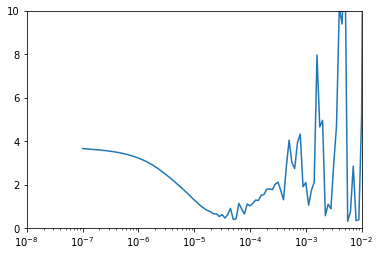

In [691]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-2, 0, 10])

<Figure size 432x288 with 0 Axes>

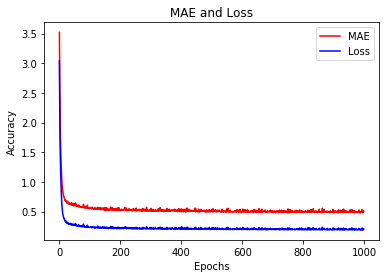

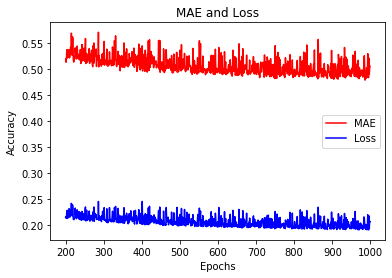

<Figure size 432x288 with 0 Axes>

In [741]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history.history['mae']
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot MAE and Loss
#------------------------------------------------
plt.plot(epochs, mae, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

epochs_zoom = epochs[200:]
mae_zoom = mae[200:]
loss_zoom = loss[200:]

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------
plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

In [742]:
forecast = []
results = []
for time in range(len(Series) - window_size):
    forecast.append(model.predict(Series.to_numpy()[time:time + window_size,:][np.newaxis]))

forecast = forecast[:]
results = np.array(forecast)[:, 0, 0]

df = Series.iloc[window_size:,-1:].reset_index(drop=True)

data=[]
data.append(go.Scatter(
            x = df.index,
            y = pd.DataFrame(prod_transformer.inverse_transform(df)).iloc[:,0],
            mode="lines",
            name="Values",))
data.append(go.Scatter(
            x = df.index,
            y = pd.DataFrame(prod_transformer.inverse_transform(results)).iloc[:,0],
            mode="lines",
            name="Forecast",))
fig=go.Figure(data=data)
pyo.iplot(fig)

In [743]:
forecast2 = []
results2 = []
for time in range(len(Series) - window_size):
    forecast2.append(model.predict(Series.to_numpy()[time:time + window_size,:][np.newaxis]))

forecast2 = forecast2[TRAIN_SIZE-window_size:]
results2 = np.array(forecast2)[:, 0, 0]

df = Series.iloc[TRAIN_SIZE:,-1:].reset_index(drop=True)

data=[]
data.append(go.Scatter(
            x = df.index,
            y = pd.DataFrame(prod_transformer.inverse_transform(df)).iloc[:,0],
            mode="lines",
            name="Values",))
data.append(go.Scatter(
            x = df.index,
            y = pd.DataFrame(prod_transformer.inverse_transform(results2)).iloc[:,0],
            mode="lines",
            name="Forecast",))
fig=go.Figure(data=data)
pyo.iplot(fig)

In [744]:
tf.keras.metrics.mean_absolute_error(prod_transformer.inverse_transform(Series.iloc[TRAIN_SIZE:,-1:]).flatten(), prod_transformer.inverse_transform(results2).flatten()).numpy()

176.53409

In [706]:
import os

checkpoint_path = "1st_model.ckpt"

# Save the weight
model.save_weights(checkpoint_path)

In [745]:
# Create a new model instance
model2 = create_model()

# Restore the weights
model2.load_weights(checkpoint_path)

In [ ]:
import pickle

Scaler_X = 'Scaler_X.sav'
Scaler_Y = 'Scaler_Y.sav'

In [749]:
pickle.dump(f_transformer, open(Scaler_X, 'wb'))

pickle.dump(prod_transformer, open(Scaler_Y, 'wb'))

In [750]:
f_transformer2 = pickle.load(open(Scaler_X, 'rb'))

prod_transformer2 = pickle.load(open(Scaler_Y, 'rb'))

In [751]:
# Evaluate the model

forecast3 = []
results3 = []
for time in range(len(Series) - window_size):
    forecast3.append(model2.predict(Series.to_numpy()[time:time + window_size,:][np.newaxis]))

forecast3 = forecast3[TRAIN_SIZE-window_size:]
results3 = np.array(forecast3)[:, 0, 0]

df = Series.iloc[TRAIN_SIZE:,-1:].reset_index(drop=True)

data=[]
data.append(go.Scatter(
            x = df.index,
            y = pd.DataFrame(prod_transformer2.inverse_transform(df)).iloc[:,0],
            mode="lines",
            name="Values",))
data.append(go.Scatter(
            x = df.index,
            y = pd.DataFrame(prod_transformer2.inverse_transform(results3)).iloc[:,0],
            mode="lines",
            name="Forecast",))
fig=go.Figure(data=data)
pyo.iplot(fig)